<a href="https://colab.research.google.com/github/jianzhiw/Machine-Learning/blob/master/Machine_Learning_01_Hello_World.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning with Python #

So, why Python? In my experience, Python is one of the easiest programming languages to learn. There is a need to iterate the process quickly, and the data scientist does not need to have a deep knowledge of the language, as they can get the hang of it real quick.
<br></br>

## Python Libraries that you should know##

1. [Numpy](https://numpy.org/)
<br>
The famous numerical analysis library. It will help you do many things, from computing the median of data distribution, to processing multidimensional arrays.
2. [Pandas](https://pandas.pydata.org/)
<br>
For processing CSV files. Of course, you will need to process some tables, and see statistics, and this is the right tool you want to use.
3. [Matplotlib](https://matplotlib.org/)
<br>
After you have the data stored in Pandas data frames, you might need some visualizations to understand more about the data. Images are still better than thousands of words.
4. [Seaborn](https://seaborn.pydata.org/)
<br>
This is also another visualization tool, but more focused on statistical visualization. Things like histograms, or pie charts, or curves, or maybe correlation tables.
5. [Scikit-Learn](https://scikit-learn.org/stable/)
<br>
This is the final boss of Machine Learning with Python. THE SO-CALLED Machine Learning with Python is this guy. Scikit-Learn. All of the things you need from algorithms to improvements are here.
6. [Tensorflow](https://www.tensorflow.org/) and [Pytorch](https://pytorch.org/)
<br>
Deep Learning libraries by Google and Facebook respectively. Worth to explore.

# Titanic: Machine Learning from Disaster #
Yes, the infamous Titanic. A tragic disaster in 1912, that took the lives of 1502 people from 2224 passengers and crew. This Kaggle competition (or I can say tutorial) gives you the real data about the disaster. And your task is to explain the data so that you can predict whether a personal survived or not during the incident.

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Download the dataset
!gdown https://drive.google.com/uc?id=1m3B5Usz8dFlF_rlsZGHXLvh5fOUYrrh8
!gdown https://drive.google.com/uc?id=1Y37aYKCPylkEPGhmRnTqlb8Rme6C5fcd

Downloading...
From: https://drive.google.com/uc?id=1m3B5Usz8dFlF_rlsZGHXLvh5fOUYrrh8
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 22.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Y37aYKCPylkEPGhmRnTqlb8Rme6C5fcd
To: /content/test.csv
100% 28.6k/28.6k [00:00<00:00, 26.9MB/s]


Read the csv and put it into the dataframe

In [0]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

Let us explore the data

In [4]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let us create a function and look at the missing data

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


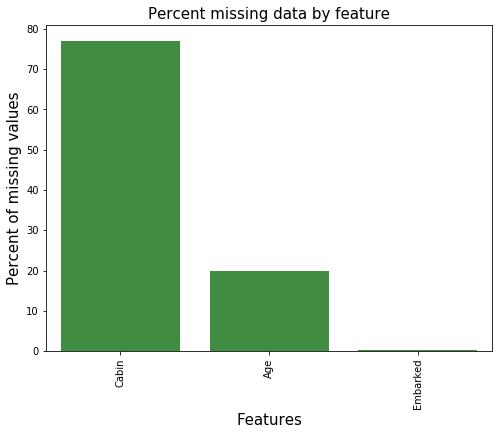

In [6]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms
missingdata(train_df)

The cabin, age, and embarked data has some missing values. And cabin information is largely missing. We need to do something about them. This is what we call Data Cleaning.


# Data Cleaning #
This is what we use 90% of the time. We will do Data Cleaning a lot for every single Machine Learning project. When the data is clean, we can easily jump ahead to the next step without worrying about anything.
<br></br>
The most common technique in Data Cleaning is filling missing data. You can fill the data missing with Mode, Mean, or Median. There is no absolute rule on these choices — you can try to choose one after another and see the performance. But, for a rule of thumb, you can only use mode for categorized data, and you can use median or mean for continuous data.
<br></br>
So let’s fill the embarkation data with Mode and the Age data with median.

In [0]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

The next important technique is to just remove the data, especially for largely missing data. Let’s do it for the cabin data.

In [0]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)

In [9]:
print('check the nan value in train data')
print(train_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Perfect! No missing data found. Means the data has been cleaned.

# Feature Engineering #
Now we have cleaned the data. The next thing we can do is Feature Engineering.
<br></br>
Feature Engineering is basically a technique for finding Feature or Data from the currently available data. There are several ways to do this technique. More often, it is about common sense.
<br></br>
Let’s take a look at the Embarked data: it is filled with Q, S, or C. The Python library will not be able to process this, since it is only able to process numbers. So you need to do something called One Hot Vectorization, changing the column into three columns. Let’s say Embarked_Q, Embarked_S, and Embarked_C which are filled with 0 or 1 whether the person embarked from that harbor or not.
<br></br>
The other example is SibSp and Parch. Maybe there is nothing interesting in both of those columns, but you might want to know how big the family was of the passenger who boarded in the ship. You might assume that if the family was bigger, then the chance of survival would increase, since they could help each other. On other hand, solo people would’ve had it hard.
<br></br>
So you want to create another column called family size, which consists of sibsp + parch + 1 (the passenger themself).
<br></br>
The last example is called bin columns. It is a technique which creates ranges of values to group several things together, since you assume it is hard to differentiate things with similar value. For example, Age. For a person aged 5 and 6, is there any significant difference? or for person aged 45 and 46, is there any big difference?
<br></br>
That’s why we create bin columns. Maybe for age, we will create 4 bins. Children (0–14 years), Teenager (14–20), Adult (20–40), and Elders (40+)
<br></br>
Let’s code them:

In [15]:
train_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [0]:
dataset = train_df
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,14,20,40,120], labels=['Children','Teenage','Adult','Elder'])
dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare', 'Average_fare','high_fare'])
                                                                               
traindf=train_df
drop_column = ['Age','Fare','Name','Ticket']
train_df.drop(drop_column, axis=1, inplace = True)
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

Now, you have finished all the features. Let’s take a look into the correlation for each feature:

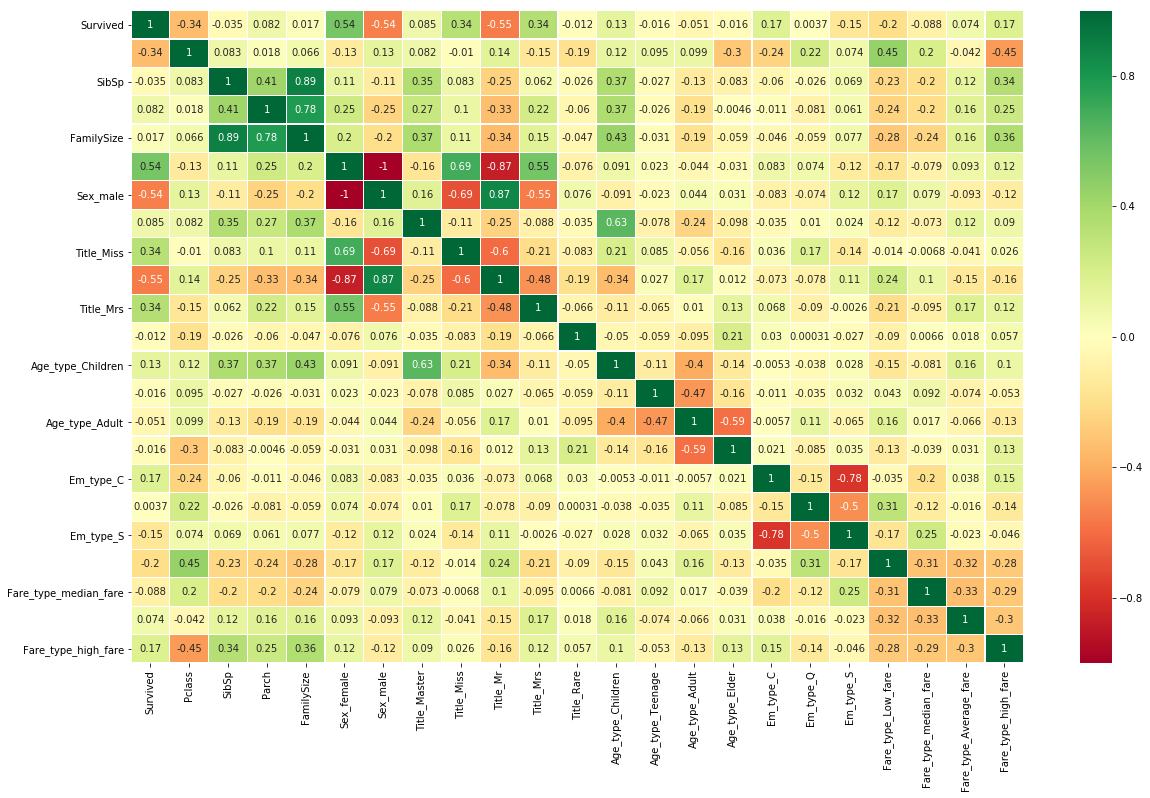

In [17]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Correlations with value of 1 means highly correlated positively, -1 means highly correlated negatively. For example, sex male and sex female will correlate negatively, since passengers had to identify as one or the other sex. Other than that, you can see that nothing related to anything highly except for the ones created via feature engineering. This means we are good to go.


In [22]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,Y_train,Y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((623, 22), (268, 22), (623,), (268,))

### Stochastic Gradient Descent (SGD) ###

In [0]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

### Random Forest ###

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### Logistics Regression ###

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

### K-Nearest Neighbors ###

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### Gaussian Naive Bayes ###

In [0]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### Perceptron ###

In [0]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

### Linear Support Vector Machine ###

In [0]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

### Decision Tree ###

In [0]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)  

Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

# Which is the best Model ? #

In [31]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
90.05,Random Forest
90.05,Decision Tree
85.71,KNN
82.83,Logistic Regression
82.66,Support Vector Machines
82.02,Stochastic Gradient Decent
81.22,Naive Bayes
78.97,Perceptron


Let us look at random forest and apply k-fold cross validation.
<br></br>
**K-Fold Cross Validation**
<br></br>
K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let’s image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.


--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 82.09
The cross validated score for Random Forest Classifier is: 83.51


Text(0.5, 1.05, 'Confusion_matrix')

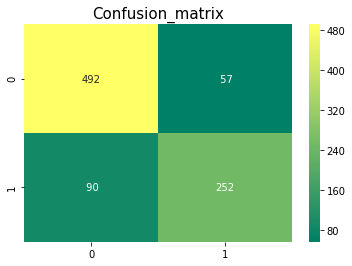

In [34]:
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,Y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is', round(accuracy_score(prediction_rm,Y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
Y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,Y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

# Fine Tuning #
Now you are done with the steps in Machine Learning with Python. But, there is one more step which can bring you better results: fine tuning. Fine tuning means finding the best parameter for Machine Learning Algorithms. If you see the code for random forest above:



> model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

There are many parameters you need to set. These are the defaults, by the way. And you can change the parameters however you want. But of course, it will takes a lot of time.
<br></br>
Don’t worry — there is a tool called Grid Search, which finds the optimal parameters automatically. Sounds great, right?

In [35]:
from sklearn.model_selection import GridSearchCV
# Random Forest Classifier Parameters tunning 
model = RandomForestClassifier()
n_estim=range(100,1000,100)
## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}
model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
model_rf.fit(X_train,y_train)
# Best score
print(model_rf.best_score_)
#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   24.5s finished


0.8154093097913323


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Reference #
[Source 1](https://medium.com/free-code-camp/how-to-get-started-with-machine-learning-in-less-than-10-minutes-b5ea68462d23)

[Source 2](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8)

Prepared by: [Wong Jian Zhi](https://github.com/jianzhiw)